<a href="https://colab.research.google.com/github/wayneotemah/Learing-TensorFlow/blob/main/Fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fine tuning,

its a  way for trasnofer leatning

**ways of transfer elarnning are** 
> Transfer learnig

> Featuer extraction

> Fine tuning

In [76]:
!nvidia-smi

Sat May 27 08:09:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    26W /  70W |   4917MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## get and install helper functions

In [77]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2023-05-27 08:09:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-05-27 08:09:35 (51.8 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [78]:
from helper_functions import  create_tensorboard_callback,plot_loss_curves, unzip_data,walk_through_dir

## lets get some data

In [79]:
#get 10 % of trainig data for food 101
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-05-27 08:09:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.128, 142.250.99.128, 173.194.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.2’

10_food_classes_10_ 100%[===================>] 160.74M   235MB/s    in 0.7s    

2023-05-27 08:09:36 (235 MB/s) - ‘10_food_classes_10_percent.zip.2’ saved [168546183/168546183]



In [80]:
# unzip the data

unzip_data("10_food_classes_10_percent.zip")

In [81]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/gri

In [82]:
# create training and test dir path

train_dir ="10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [83]:
import tensorflow as tf

IMG_SIZE = (224,224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode = "categorical",
                                                                            batch_size = BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                image_size = IMG_SIZE,
                                                                label_mode = "categorical",
                                                                batch_size = BATCH_SIZE)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [84]:
train_data_10_percent

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [85]:
#class names of dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [86]:
#see an example of data batch

for image, labels in train_data_10_percent.take(1):
  print(image, labels)

tf.Tensor(
[[[[ 50.407204    46.407204    35.407204  ]
   [ 52.140625    48.140625    38.70759   ]
   [ 53.09327     48.787468    40.70488   ]
   ...
   [182.98584    200.06848    202.37427   ]
   [180.16136    198.16136    200.16136   ]
   [185.5519     203.5519     205.5519    ]]

  [[ 56.13696     49.13696     39.13696   ]
   [ 56.984535    49.984535    41.5515    ]
   [ 53.683514    47.29512     39.906727  ]
   ...
   [191.9758     209.05844    211.36423   ]
   [189.1331     207.1331     209.1331    ]
   [181.87032    199.87032    201.87032   ]]

  [[ 57.63648     48.63648     41.63648   ]
   [ 55.9831      48.214287    40.93447   ]
   [ 55.752075    48.38903     41.643497  ]
   ...
   [183.15643    201.15643    202.85892   ]
   [183.15161    201.15161    202.72304   ]
   [178.95721    196.95721    198.52864   ]]

  ...

  [[133.15201    138.15201    132.15201   ]
   [131.95587    136.95587    130.95587   ]
   [131.06552    136.06552    130.06552   ]
   ...
   [169.52005    176.520

## creating the models with keras funtional API

In [87]:
#1.  create base model with tf.keras.applicaation 

base_model = tf.keras.applications.EfficientNetB0(include_top  = False)

# 2. freeze the base model

base_model.trainable = False

# 3. create inpute into our model
inputs = tf.keras.layers.Input(shape = (224,224,3),name = "input_layer")

# 4. if using ResNet50V2 you will need to normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

# 5. pass the inputs the base_model
x = base_model(inputs)

print(f"shaped after passing inputs throught base model: {x.shape}")

# 6. average pool the  outputs of the base model

x = tf.keras.layers.GlobalAveragePooling2D(name = "global_avarage_pulling_layer")(x)

print(f"shape after the GlobalAveragePooling2D: {x.shape}")

# 7. create the output activation layer
outputs = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)


# 8. combine the inputs with the outputs int a model
model_0 = tf.keras.Model(inputs,outputs) 

# 9. compile the models

model_0.compile(loss = "categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 10.  fit the model

# history_0 = model_0.fit(
#     train_data_10_percent,
#     epochs=5,
#     steps_per_epoch=len(train_data_10_percent),
#     validation_data=test_data,
#     validation_steps=len(test_data),
#     # Add TensorBoard callback to model (callbacks parameter takes a list)
#     callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",experiment_name="efficentNetB0")])


shaped after passing inputs throught base model: (None, 7, 7, 1280)
shape after the GlobalAveragePooling2D: (None, 1280)


In [88]:
# evaluate on
# model_0.evaluate(test_data)

In [89]:
# base_model.summary()

In [90]:
# model_0.summary()

In [91]:
# plot loss curve
# plot_loss_curves(history_0)

# series of transefer learning expermients

`model_1`: Use feature extraction transfer learning on 1% of the training data with data augmentation.

`model_2`: Use feature extraction transfer learning on 10% of the training data with data augmentation.

`model_3`: Use fine-tuning transfer learning on 10% of the training data with data augmentation.

`model_4`: Use fine-tuning transfer learning on 100% of the training data with data augmentation.

## Experiment Model 1

### get and preprocess the data

In [92]:
# get the data zip
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2023-05-27 08:09:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.128, 142.250.99.128, 173.194.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M   104MB/s    in 1.2s    

2023-05-27 08:09:51 (104 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [93]:
unzip_data("10_food_classes_1_percent.zip")

In [94]:
train_dir_1_percent_dir = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [95]:
# how many images are we working with

walk_through_dir(train_dir_1_percent_dir)
walk_through_dir(test_dir)

There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
T

In [96]:
# set up deter loaders

IMG_SIZE = (224,224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent_dir,
                                                                       label_mode = "categorical",
                                                                       image_size = IMG_SIZE,
                                                                       batch_size = BATCH_SIZE)


test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                image_size = IMG_SIZE,
                                                                batch_size = BATCH_SIZE)



Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Adding data augmentation right into the model

In [97]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# create data augmentation stage stage with horizontal,flipping,rotations and,zoom,etc 

In [98]:
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)
],name = "data_augmentation")



In [99]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
def view_random_augmented_image(folder_name,augmentation_layer):
    target_class = random.choice(train_data_10_percent.class_names)
    target_dir = folder_name+target_class
    random_image = random.choice(os.listdir(target_dir))
    random_image_path = target_dir + '/' + random_image

    img = mpimg.imread(random_image_path)

    plt.imshow(img)
    plt.axis(False)
    plt.title(f"original random image from class: {target_class}")

    # Not lets plt the augmentes randome image

    augmented_image = augmentation_layer(img)
    plt.figure()
    plt.imshow(tf.squeeze((augmented_image)/255))
    plt.axis(False)
    plt.title(f"augmented image of: {target_class}")


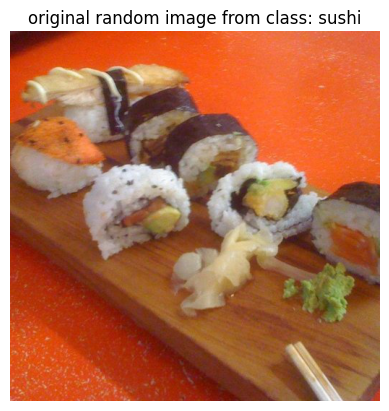

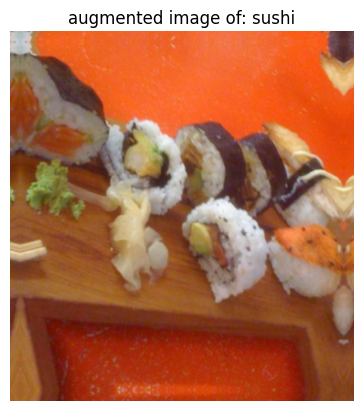

In [100]:
view_random_augmented_image("10_food_classes_1_percent/train/",data_augmentation)

 ### building `model_1`

In [101]:
input_shape = IMG_SIZE+(3,) 
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# create input data
inputs = layers.Input(shape=input_shape,name="input_shape")


# add in data augmentation
x = data_augmentation(inputs)

# give base model the inputs after augmentation and dont train it
x = base_model(x,training = False)

# pool output features of the model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# put a dense layer on the output
outputs = layers.Dense(10, activation="softmax",name="output_layer")(x)

# make the model using the inputs and outputs

model_1 = keras.Model(inputs,outputs)

model_1.compile(loss = "categorical_crossentropy",
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["accuracy"])


history_1 = model_1.fit(train_data_1_percent,
                        epochs = 5,
                        steps_per_epoch=len(train_data_1_percent),
                        validation_data = test_data,
                        validation_steps = int(0.25*len(test_data)),
                        # track model training logs
                        callbacks = [create_tensorboard_callback(dir_name="transfer_learning",
                                                                  experiment_name = "1_percent_data_aug")]
                        )


Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20230527-080957
Epoch 1/5
3/3 [==============================] - 13s 3s/step - loss: 2.3206 - accuracy: 0.0714 - val_loss: 2.2257 - val_accuracy: 0.1513
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.0870 - accuracy: 0.3286 - val_loss: 2.0917 - val_accuracy: 0.2336
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 1.9051 - accuracy: 0.3571 - val_loss: 1.9830 - val_accuracy: 0.2845
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.7454 - accuracy: 0.5143 - val_loss: 1.8770 - val_accuracy: 0.3586
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.6130 - accuracy: 0.6143 - val_loss: 1.7884 - val_accuracy: 0.4441


In [102]:
model_1.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_shape (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, 3)          0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [103]:
# Evaluate the model on the full dataset
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 8s 91ms/step - loss: 1.8079 - accuracy: 0.4108


[1.8078739643096924, 0.4108000099658966]

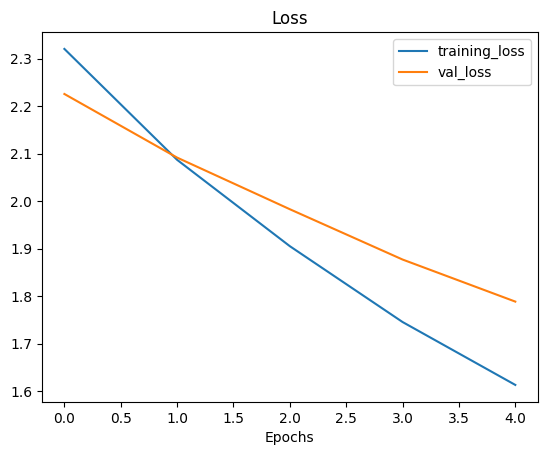

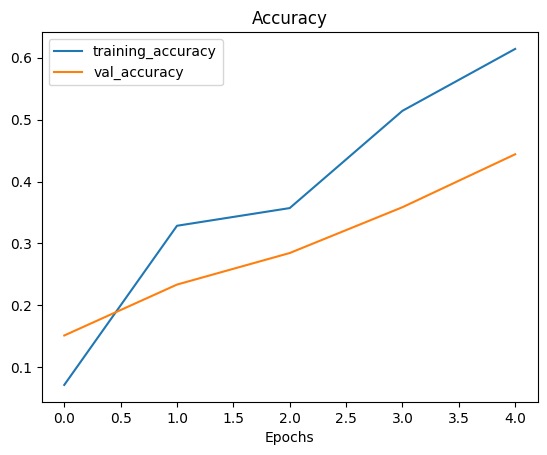

In [104]:
plot_loss_curves(history_1)

## Experiment `Model_2`

In [105]:
# get the data and unzip

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-05-27 08:10:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 142.250.107.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.3’

10_food_classes_10_ 100%[===================>] 160.74M   168MB/s    in 1.0s    

2023-05-27 08:10:38 (168 MB/s) - ‘10_food_classes_10_percent.zip.3’ saved [168546183/168546183]



In [106]:
unzip_data("10_food_classes_10_percent.zip")

In [107]:
train_dir_10_percent = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [108]:
IMG_SIZE

(224, 224)

In [109]:
import tensorflow as tf
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_10_percent,
    label_mode = "categorical",
    image_size = IMG_SIZE,
    )

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode = "categorical",
    image_size=IMG_SIZE
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [110]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
],name="data_augmentaion")




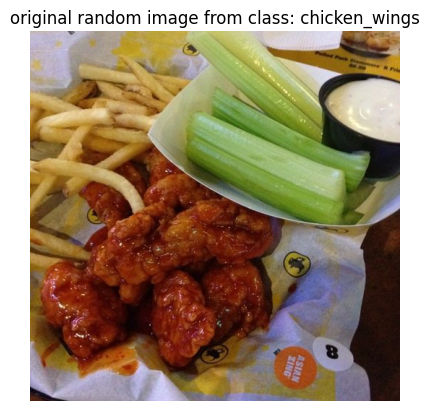

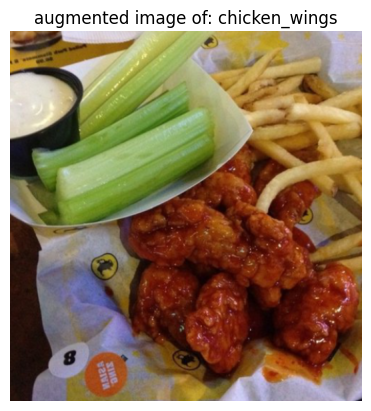

In [111]:
view_random_augmented_image("10_food_classes_10_percent/train/",data_augmentation)

In [112]:
input_shape = (224,224,3)

# create a frozen base model (also called the backbone)

base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# input layers, middle layes, out_put layer
inputs = layers.Input(shape=input_shape,name="input_layer")

x = data_augmentation(inputs)

x = base_model(x,training=False)

x = layers.GlobalAveragePooling2D(name = "global_avarage_pooling_2D")(x)

outputs = layers.Dense(10,activation="softmax",name="output_layer")(x)

model_2 = tf.keras.Model(inputs,outputs)


model_2.compile(loss = "categorical_crossentropy",
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["accuracy"])


### creating model check point callback

In [113]:
# Setup checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"


# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, # save only the best model weights instead of a model every epoch 
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [114]:
# fit the model with the modelc checkpoint callback

inintal_epochs = 5

history_2 = model_2.fit(train_data_10_percent,
                        epochs = inintal_epochs,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data = test_data,
                        validation_steps = int(0.25*len(test_data)),
                        callbacks = [create_tensorboard_callback(dir_name="transfer_learning",
                                                      experiment_name = "10_percent_data_aug"),
                                     checkpoint_callback]
            )

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20230527-081044
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9020 - accuracy: 0.4320
Epoch 1: val_loss improved from inf to 1.41890, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 19s 532ms/step - loss: 1.9020 - accuracy: 0.4320 - val_loss: 1.4189 - val_accuracy: 0.6694
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.1564 - accuracy: 0.7213
Epoch 2: val_loss improved from 1.41890 to 0.96699, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 11s 437ms/step - loss: 1.1564 - accuracy: 0.7213 - val_loss: 0.9670 - val_accuracy: 0.7780
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.8598 - accuracy: 0.8013
Epoch 3: val_loss improved from 0.96699 to 0.77445, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [=

In [115]:
results_1_percent_data_aug

[1.8078739643096924, 0.4108000099658966]

In [116]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 7s 78ms/step - loss: 0.5737 - accuracy: 0.8588


[0.5737030506134033, 0.8587999939918518]

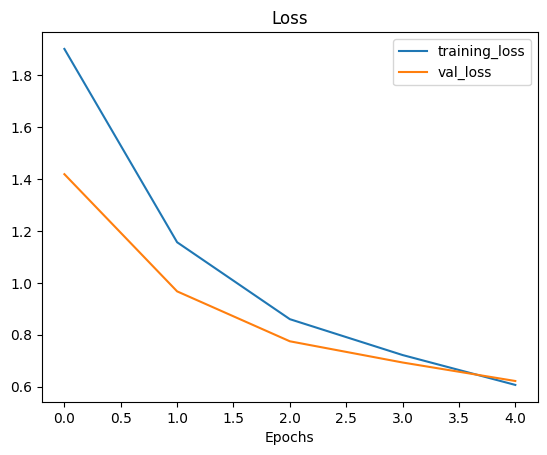

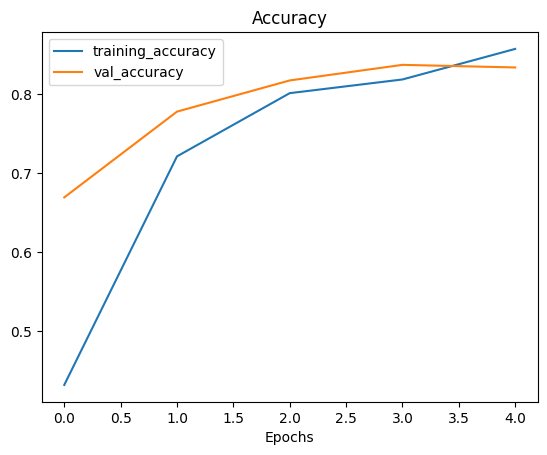

In [117]:
plot_loss_curves(history_2)

###loading in checkpointed weights

In [118]:
# load in shaves model weights and evaluate
model_2.load_weights(checkpoint_path)

In [119]:
# evalute model_2 with loaded weights
loaded_weights_model_results = model_2.evaluate(test_data)

loaded_weights_model_results

79/79 [==============================] - 6s 64ms/step - loss: 0.5737 - accuracy: 0.8588


[0.5737029910087585, 0.8587999939918518]

In [120]:
results_10_percent_data_aug

[0.5737030506134033, 0.8587999939918518]

In [121]:
loaded_weights_model_results[1] ==results_10_percent_data_aug[1]

True

In [122]:

import numpy as np
# Check to see if loaded model results are very close to native model results (should output True)
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))

array([ True,  True])

In [123]:

# Check the difference between the two results
print(np.array(results_10_percent_data_aug) - np.array(loaded_weights_model_results))

[5.96046448e-08 0.00000000e+00]


## Experiment `Model_3`

In [124]:
# layers in loaded model
model_2.layers

In [125]:
# are the layers trainable

for layer in model_2.layers:
  print(layer.name,layer.trainable)

input_layer True
data_augmentaion True
efficientnetb0 False
global_avarage_pooling_2D True
output_layer True


In [ ]:
# are the layers in the  base model trainable

for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name,layer.trainable)

In [129]:
# number of trainable variables in the base model

print(len(model_2.layers[2].trainable_variables)) 

0


In [130]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-10]:
  layer.trainable = False


In [131]:
# Recompile the model (always recompile after any adjustments to a model)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [ ]:

# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

In [136]:
# how many trainable variables are in out base and model_2
print(f"trainalbe variables for the base model: {len(model_2.layers[2].trainable_variables)}")
print(f"trainalbe variables for the model 2 : {len(model_2.trainable_variables)}")

trainalbe variables for the base model: 10
trainalbe variables for the model 2 : 12


The last 10 layers in efficentNetB0 + the last 2 layers of you model_2 , total = 12 layers

In [138]:
# Fine tune for another 5 epochs
fine_tune_epochs = inintal_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_2.epoch[-1], # start from previous last epoch
                                               validation_steps=int(0.25 * len(test_data)),
                                               callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")]) # name experiment appropriately
     

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20230527-082340
Epoch 5/10
24/24 [==============================] - 22s 439ms/step - loss: 0.5005 - accuracy: 0.8680 - val_loss: 0.5006 - val_accuracy: 0.8520
Epoch 6/10
24/24 [==============================] - 9s 374ms/step - loss: 0.3867 - accuracy: 0.8933 - val_loss: 0.4223 - val_accuracy: 0.8635
Epoch 7/10
24/24 [==============================] - 8s 330ms/step - loss: 0.3100 - accuracy: 0.9133 - val_loss: 0.4707 - val_accuracy: 0.8421
Epoch 8/10
24/24 [==============================] - 8s 329ms/step - loss: 0.2762 - accuracy: 0.9253 - val_loss: 0.4411 - val_accuracy: 0.8438
Epoch 9/10
24/24 [==============================] - 10s 367ms/step - loss: 0.2365 - accuracy: 0.9427 - val_loss: 0.5057 - val_accuracy: 0.8421
Epoch 10/10
24/24 [==============================] - 8s 319ms/step - loss: 0.2035 - accuracy: 0.9493 - val_loss: 0.4855 - val_accuracy: 0.8421


In [139]:
# evaluate the model_3
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 8s 96ms/step - loss: 0.3748 - accuracy: 0.8760


In [140]:
results_fine_tune_10_percent

[0.37480083107948303, 0.8759999871253967]

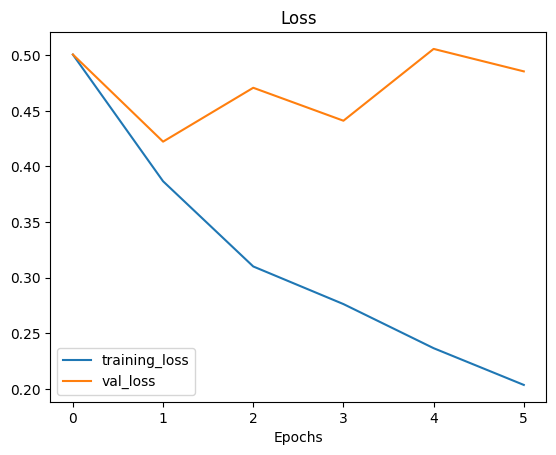

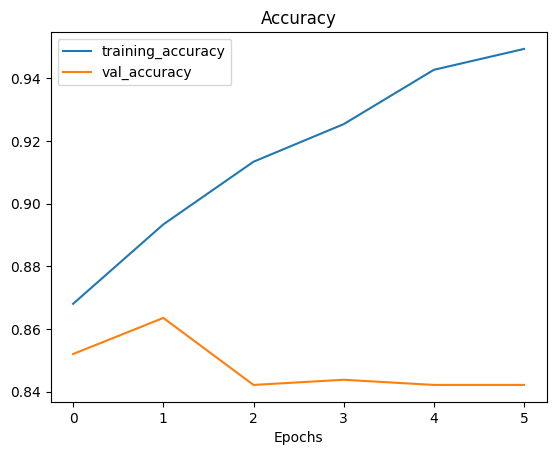

In [141]:
# checkout loss curves
plot_loss_curves(history_fine_10_percent_data_aug)

In [143]:

def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.4320000112056732, 0.7213333249092102, 0.8013333082199097, 0.8186666369438171, 0.8573333621025085, 0.8679999709129333, 0.8933333158493042, 0.9133333563804626, 0.9253333210945129, 0.9426666498184204, 0.9493333101272583]


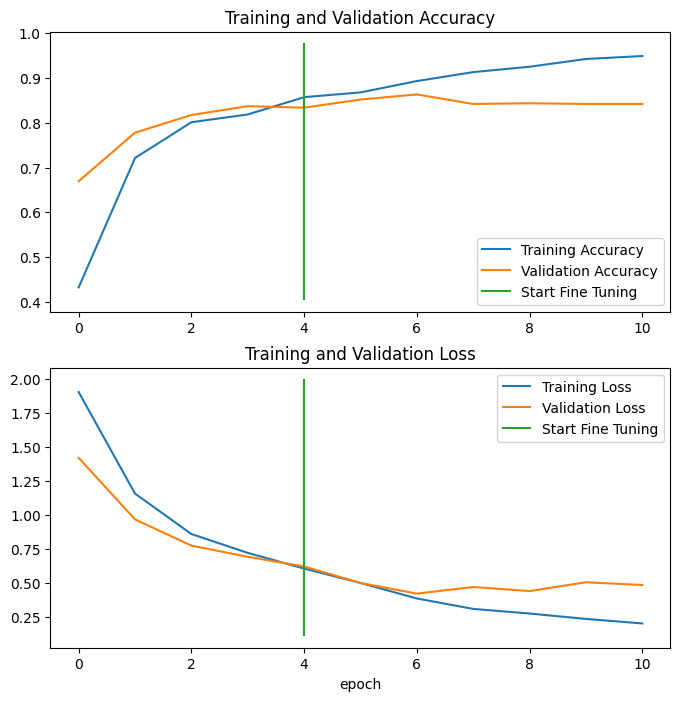

In [144]:

compare_historys(original_history=history_2, 
                 new_history=history_fine_10_percent_data_aug, 
                 initial_epochs=5)
     

## Experiment `Model_4`

In [145]:

# Download and unzip 10 classes of data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"
     


--2023-05-27 08:36:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  76.5MB/s    in 8.0s    

2023-05-27 08:36:47 (61.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [146]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 

In [148]:

# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)

# Note: this is the same test dataset we've been using for the previous modelling experiments
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)
     


Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [149]:
# After loading the weights, this should have gone down (no fine-tuning)
model_2.evaluate(test_data)

79/79 [==============================] - 7s 80ms/step - loss: 0.3748 - accuracy: 0.8760


[0.37480077147483826, 0.8759999871253967]

In [158]:
# Load the weights from check points


# Load model from checkpoint, that way we can fine-tune from the same stage the 10 percent data model was fine-tuned from
checkpoint_dir = "ten_percent_model_checkpoints_weights"
latest_weights = tf.train.latest_checkpoint(checkpoint_dir)

# Load the checkpoint variables
checkpoint = tf.train.Checkpoint(model=model_2)
checkpoint.restore(latest_weights)


In [160]:

# After loading the weights, this should have gone down (no fine-tuning)
model_2.evaluate(test_data)

79/79 [==============================] - 8s 88ms/step - loss: 0.5737 - accuracy: 0.8588


[0.5737028121948242, 0.8587999939918518]

In [162]:

# After loading the weights, this should have gone down (no fine-tuning)
results_10_percent_data_aug

[0.5737030506134033, 0.8587999939918518]

In [163]:

# Check which layers are tuneable in the whole model
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentaion True
2 efficientnetb0 True
3 global_avarage_pooling_2D True
4 output_layer True


In [ ]:

# Check which layers are tuneable in the base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

In [165]:

# Compile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # divide learning rate by 10 for fine-tuning
                metrics=["accuracy"])
     

In [166]:
fine_tune_epochs = inintal_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs=fine_tune_epochs,
                                           initial_epoch=history_2.epoch[-1],
                                           validation_data=test_data,
                                           validation_steps=int(0.25 * len(test_data)),
                                           callbacks=[create_tensorboard_callback("transfer_learning", "full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20230527-093240
Epoch 5/10
235/235 [==============================] - 69s 255ms/step - loss: 0.5478 - accuracy: 0.8277 - val_loss: 0.3443 - val_accuracy: 0.8980
Epoch 6/10
235/235 [==============================] - 52s 219ms/step - loss: 0.4151 - accuracy: 0.8617 - val_loss: 0.2726 - val_accuracy: 0.9243
Epoch 7/10
235/235 [==============================] - 50s 211ms/step - loss: 0.3550 - accuracy: 0.8841 - val_loss: 0.2776 - val_accuracy: 0.9161
Epoch 8/10
235/235 [==============================] - 52s 221ms/step - loss: 0.3068 - accuracy: 0.9025 - val_loss: 0.2521 - val_accuracy: 0.9145
Epoch 9/10
235/235 [==============================] - 44s 184ms/step - loss: 0.2789 - accuracy: 0.9101 - val_loss: 0.2669 - val_accuracy: 0.9227
Epoch 10/10
235/235 [==============================] - 42s 178ms/step - loss: 0.2473 - accuracy: 0.9196 - val_loss: 0.2811 - val_accuracy: 0.9194


In [167]:

results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 7s 77ms/step - loss: 0.2584 - accuracy: 0.9152


[0.25836464762687683, 0.9151999950408936]

5
11
[0.4320000112056732, 0.7213333249092102, 0.8013333082199097, 0.8186666369438171, 0.8573333621025085, 0.8277333378791809, 0.8617333173751831, 0.8841333389282227, 0.9025333523750305, 0.9101333618164062, 0.9196000099182129]


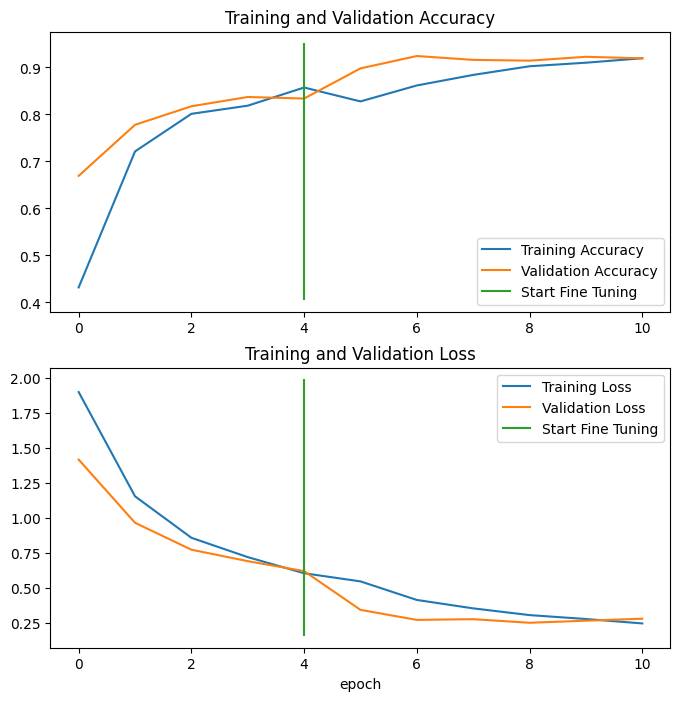

In [168]:

# How did fine-tuning go with more data?
compare_historys(original_history=history_2,
                 new_history=history_fine_10_classes_full,
                 initial_epochs=5)

# view experiments in Tensorboard

In [ ]:
# View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# Upload TensorBoard dev records
# !tensorboard dev upload --logdir ./transfer_learning \
#    --name "Transfer learning experiments" \
#    --description "A series of different transfer learning experiments with varying amounts of data and fine-tuning" \
#    --one_shot # exits the uploader when upload has finished

In [ ]:

# View previous experiments
!tensorboard dev list


In [ ]:


# Remove previous experiments
# !tensorboard dev delete --experiment_id q7ofpvyVS7es7LS9NxbVww
# !tensorboard dev delete --experiment_id NZjrjojEQEe6Kjb81v2yxA

In [172]:
!tensorboard dev list

2023-05-27 09:50:27.426312: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
No experiments. Use `tensorboard dev upload` to get started.
